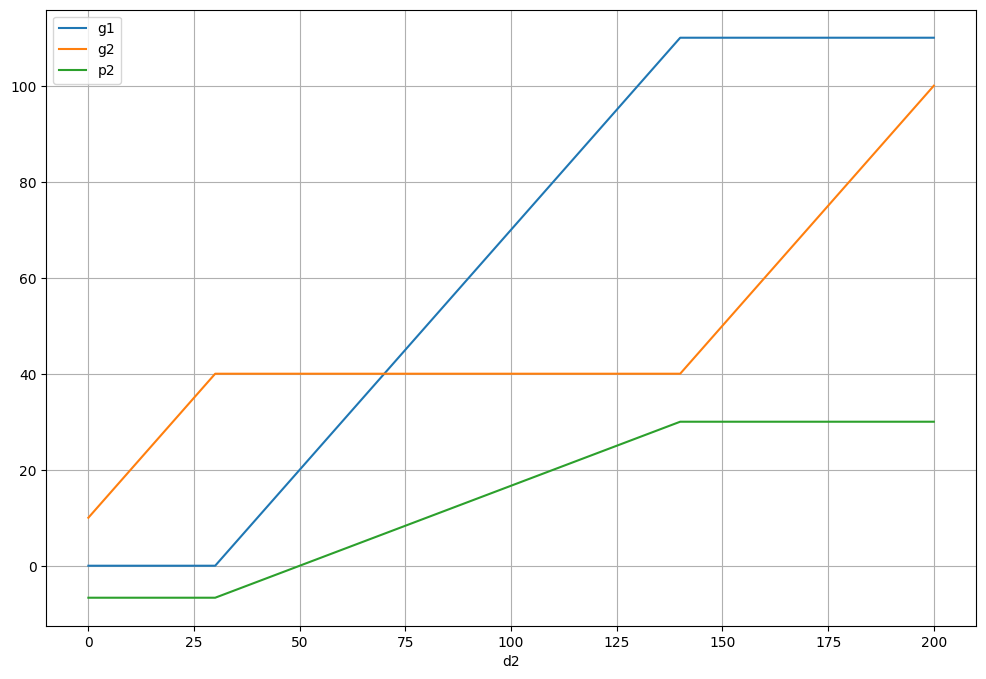

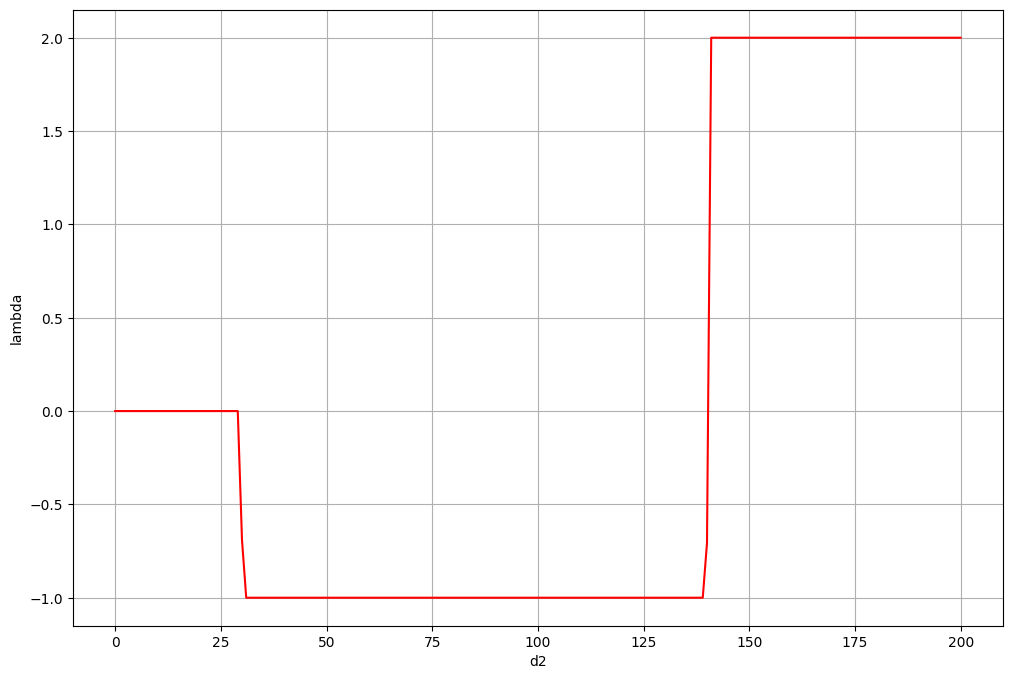

In [ ]:
#Ejercicio 2

import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

# Datos
R = 30 # MW
d3 = 10 # MW

# Listas para guardar resultados
valores_g1 = []
valores_g2 = []
valores_p2 = []
valores_lambda = []

# Variables
g1 = cp.Variable()
g2 = cp.Variable()
p1 = cp.Variable()
p2 = cp.Variable()
p3 = cp.Variable()
t = cp.Variable()

# Restricciones
restricciones = [
    p1 + p3 == g1,
    g2 + p3 + p2 == 0, #Luego se agrega d2
    p1 - p2 == d3,
    p3 - p1 - p2 == 0,
    p2 <= R,
    p2 >= -R,
    t >= 4 * (g2 - 40),
    t >= 0,
    g1 >= 0,
    g2 >= 0
]

# Se itera sobre valores de d2
rango_d2 = range(0, 201)
for d2 in rango_d2:
  # Se agrega d2 a la restriccion
  restricciones[1] = g2 + p3 + p2 == d2

  # Se define el problema
  objetivo = cp.Minimize(g1 + t)
  problema = cp.Problem(objetivo, restricciones)

  # Se resuelve el problema
  problema.solve()

  # Resultados
  valores_g1.append(g1.value)
  valores_g2.append(g2.value)
  valores_p2.append(p2.value)
  valores_lambda.append(restricciones[2].dual_value)

# Graficas
plt.figure(figsize=(12, 8))
plt.plot(rango_d2, valores_g1, label='g1')
plt.plot(rango_d2, valores_g2, label='g2')
plt.plot(rango_d2, valores_p2, label='p2')
plt.xlabel('d2')
plt.grid()
plt.legend()

plt.figure(figsize=(12, 8))
plt.plot(rango_d2, valores_lambda, 'r')
plt.xlabel('d2')
plt.ylabel('lambda')
plt.grid()

